Student Number: 99210259,
Student Name: Amir Pourmand


In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

#Problem 3

## A)

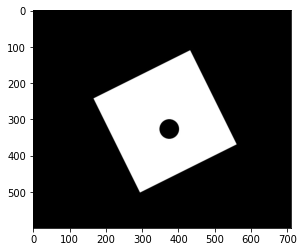

In [160]:
hole = cv2.imread('hole.jpg')
hole = cv2.cvtColor(hole,cv2.COLOR_BGR2GRAY)
plt.imshow(hole,cmap='gray')

In [3]:
def plot_binary(image,title=''):
  plt.imshow(image,cmap='gray')
  plt.title(title), plt.xticks([]),plt.yticks([])

def read_binary_image(filename):
  image = cv2.imread(filename)
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

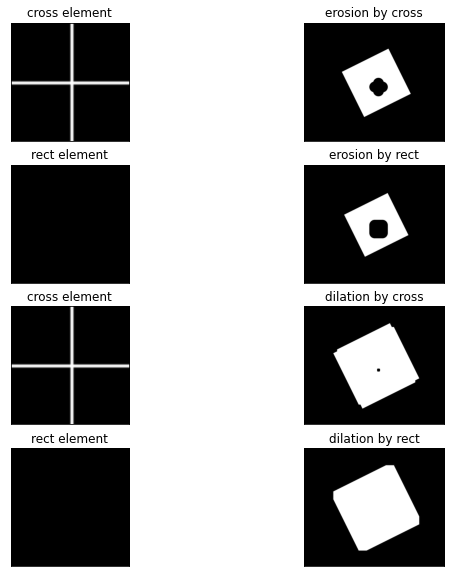

In [179]:
rectangle=cv2.getStructuringElement(cv2.MORPH_RECT,ksize=(40,40))
cross=cv2.getStructuringElement(cv2.MORPH_CROSS,ksize=(40,40))

plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
plot_binary(cross,'cross element')
plt.subplot(4,2,2)
plot_binary(cv2.erode(hole,cross),'erosion by cross')

plt.subplot(4,2,3)
plot_binary(rectangle,'rect element')
plt.subplot(4,2,4)
plot_binary(cv2.erode(hole,rectangle),'erosion by rect')

plt.subplot(4,2,5)
plot_binary(cross,'cross element')
plt.subplot(4,2,6)
plot_binary(cv2.dilate(hole,cross),'dilation by cross')

plt.subplot(4,2,7)
plot_binary(rectangle,'rect element')
plt.subplot(4,2,8)
plot_binary(cv2.dilate(hole,rectangle),'dilation by rect')


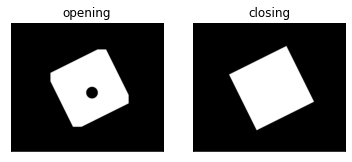

In [184]:
plt.subplot(1,2,1)
plot_binary(cv2.dilate(cv2.erode(hole,rectangle),rectangle),'opening')
plt.subplot(1,2,2)
plot_binary(cv2.erode(cv2.dilate(hole,rectangle),rectangle),'closing')

It is easy to see that opening is like putting rectangle in different places and closing would just fill the empty space. As the empty space is filled, the question 3 is also done.

## B)

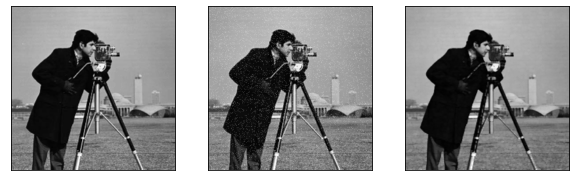

In [196]:
cameraman =read_binary_image('cameraman.jpg')
noisycameraman =read_binary_image('noisycameraman.jpg')

ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,ksize=(5,5))

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plot_binary(cameraman)
plt.subplot(1,3,2)
plot_binary(noisycameraman)
plt.subplot(1,3,3)
plot_binary(cv2.morphologyEx(noisycameraman,cv2.MORPH_OPEN,ellipse))


I've just done and opening and it's by definition useful for removing noise

## C)

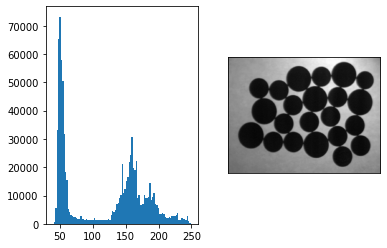

In [202]:
circles = read_binary_image('circles.jpg')
plt.subplot(1,2,1)
plt.hist(circles.ravel(),bins=100);

plt.subplot(1,2,2)
plot_binary(circles)
plt.show()

100.0 112.0


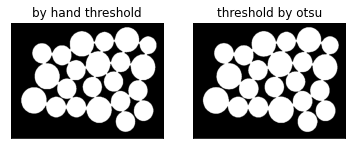

In [222]:
th1,ret = cv2.threshold(circles,100,255,cv2.THRESH_BINARY_INV)
plt.subplot(1,2,1)
plot_binary(ret,'by hand threshold')
th2,ret2 = cv2.threshold(circles,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.subplot(1,2,2)
plot_binary(ret2,'threshold by otsu')
print(th1,th2)

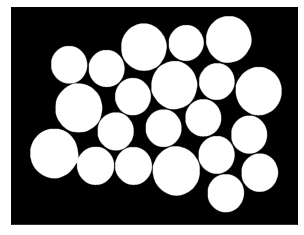

In [228]:
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,ksize=(120,120))
plot_binary(cv2.morphologyEx(ret2,cv2.MORPH_OPEN,ellipse))

I used opening for this matter and it works perfectly.

## D)

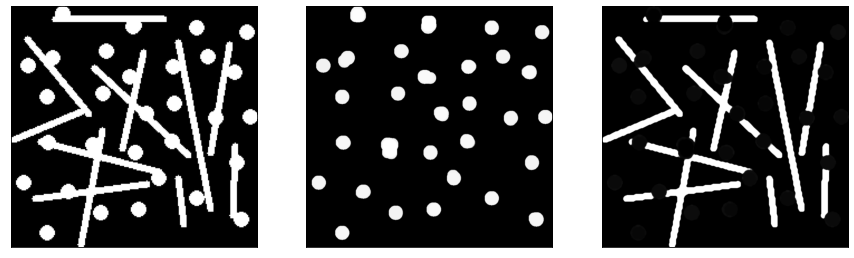

In [46]:
lines=read_binary_image('lines_circles.jpg')
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plot_binary(lines)

ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,ksize=(40,40))
plt.subplot(1,3,2)
just_circles =cv2.morphologyEx(lines,cv2.MORPH_OPEN,ellipse) 
plot_binary(just_circles)


plt.subplot(1,3,3)

just_lines = lines-just_circles
blur = cv2.medianBlur(just_lines,9)
plot_binary(blur)


AS It is clear, I used opening for extracting circles and I used subtraction and blur to extract lines

# Problem 4

(795, 1110, 3)


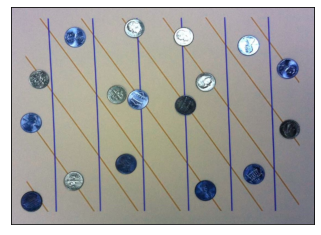

In [130]:
coins=cv2.imread('coins.jpg')
plt.imshow(coins), plt.xticks(ticks=[]),plt.yticks(ticks=[])
print(coins.shape)

## Problem 4 - My Implementation of hough transform

In [136]:
class HoughTransform:
    def __init__(self,image): 
      self.image = np.copy(image)
      self.edges = None
      self.lined_image = np.copy(image)

    def canny_edge_detection(self):
      self.edges = cv2.Canny(self.image,100,200)

    def get_lines(self):
      
      theta_count = 180
      self.theta_values = np.arange(0,+np.pi,np.pi/theta_count)
      
      rho_count = self.edges.shape[0]
      d = np.sqrt(np.square(self.image.shape[0])+np.square(self.image.shape[1]))
      self.rho_values = np.arange(-d,d,2*d/rho_count)
      
      accumulator_matrix = np.zeros(shape=(rho_count,theta_count))
      
      for x in range(self.edges.shape[0]):
        for y in range(self.edges.shape[1]):
          if self.edges[x,y] == 0:
            continue
          
          for theta_index in range(len(self.theta_values)):
            theta = self.theta_values[theta_index]

            rho = (x)*np.cos(theta) + (y)*np.sin(theta)
            rho_index=np.argmin(np.abs(self.rho_values-rho))
            
            accumulator_matrix[rho_index,theta_index] += 1
      return accumulator_matrix
    
    def make_linedimage(self,accumulator_matrix):
      threshold = 500

      for rho_idx in range(accumulator_matrix.shape[0]):
        for theta_idx in range(accumulator_matrix.shape[1]):
          if accumulator_matrix[rho_idx,theta_idx] > threshold:
            rho = self.rho_values[rho_idx]
            theta = self.theta_values[theta_idx]
            
            a = np.sin(theta)
            b= np.cos(theta)

            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))

            line_thickness = 2
            cv2.line(self.lined_image, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness )
            

              
                
          
      

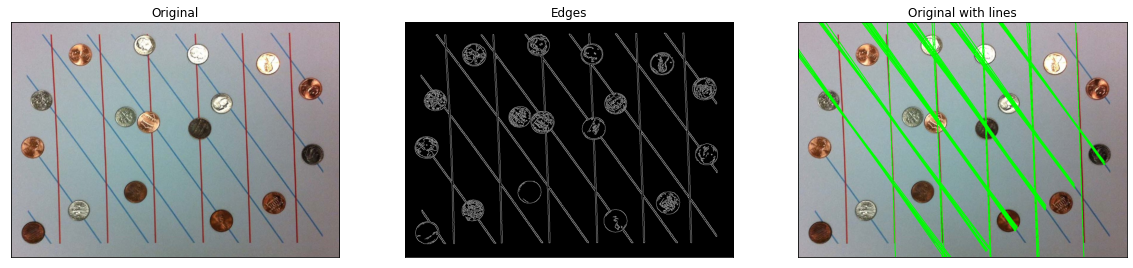

In [137]:
hough = HoughTransform(coins)
hough.canny_edge_detection()
hough.make_linedimage(hough.get_lines())


plt.figure(1,figsize=(20,20))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(hough.image, cv2.COLOR_BGR2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2)
plt.imshow(hough.edges, cmap='gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(hough.lined_image, cv2.COLOR_BGR2RGB))
plt.title('Original with lines'), plt.xticks([]), plt.yticks([])

plt.show()

## Problem 4 - Open Cv implementation of hough transform


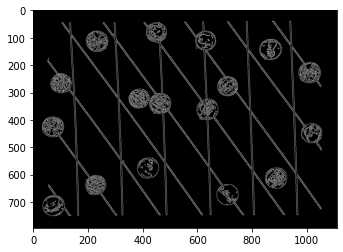

In [ ]:
gray_coin = cv2.cvtColor(coins,cv2.COLOR_RGB2GRAY)
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray_coin, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')

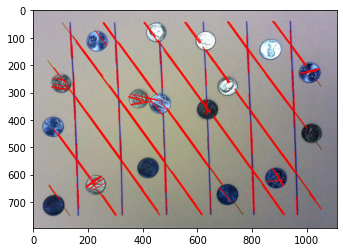

In [135]:
rho = 1
theta = np.pi/180
threshold = 60
min_line_length =50
max_line_gap = 5
line_image = np.copy(coins) 
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)
        
plt.imshow(line_image)